<a href="https://colab.research.google.com/github/ZackYovel/GA-for-Hyper-Parameter-Tuning/blob/MLK/GA_queen_ant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Genetic Algorithm for Hyper Parameter Tuning

## Using data from the kaggle Housing Prices Competition for Kaggle Learn Users

Using multiple populations.

Competition URL: https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import concurrent.futures
import random
import json
import os
import heapq
import time
import logging

random_gen = default_rng()

In [2]:
# Data load
project_files_path = os.path.join("drive", "My Drive", "Colab Notebooks", "GA_queen_ant")

train = pd.read_csv(os.path.join(project_files_path, "train.csv"))
X_test = pd.read_csv(os.path.join(project_files_path, "test.csv"))

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Preprocess data

numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

most_frequent_num_imputer = SimpleImputer(strategy='most_frequent')
most_frequent_cat_imputer = SimpleImputer(strategy='most_frequent')

low_cardinality_cols = [col for col in categorical_columns if X_train[col].nunique() < 10]
high_cardinality_cols = set(categorical_columns) - set(low_cardinality_cols)
good_label_cols = [col for col in high_cardinality_cols if set(X_train[col]).issuperset(set(X_cv[col]))]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

ordinal_encoder = OrdinalEncoder()

numerical_transformer = most_frequent_num_imputer

categorical_low_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', OH_encoder)
    ]
)

categorical_high_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', ordinal_encoder)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numerical_transformer, numerical_columns),
                  ('cat_low_card', categorical_low_card_transformer, low_cardinality_cols),
                  ('cat_high_card', categorical_high_card_transformer, good_label_cols)
    ]
)


X_train_prepped = preprocessor.fit_transform(X_train)
X_cv_prepped = preprocessor.transform(X_cv)
X_test_prepped = preprocessor.transform(X_test)

In [4]:
def model_from_hp(hp):
  return RandomForestRegressor(n_estimators=hp['n_estimators'],
                               criterion='mae',
                               max_depth=hp['max_depth'],
                               min_samples_split=hp['min_samples_split'],
                               min_samples_leaf=hp['min_samples_leaf'],
                               min_weight_fraction_leaf=hp['min_weight_fraction_leaf'],
                               max_features=hp['max_features'],
                               max_leaf_nodes=hp['max_leaf_nodes'],
                               min_impurity_decrease=hp['min_impurity_decrease'],
                               bootstrap=hp['bootstrap'],
                               oob_score=hp['oob_score'],
                               n_jobs=-1,
                               ccp_alpha=hp['ccp_alpha'],
                               max_samples=hp['max_samples'])

## Hyper Parameter Tuning Using a Genetic Algorithm

### Algorithm Description:
1. Prepare generation 0: initialize n_territories teritories each of which has pop_size instances of hyper parameter sets with random values in it's population.
2. For each generation (steps 3-16):
3. For each teritory (steps 4-14):
4. For each specimen in the population (steps 5-7):
5. Build a model based on the specimen
6. Evaluate the model
7. While unevaluated specimen remain go back to step 4.
8. Breed population until it reaches pop_size:
9. While population size is less than pop_size (steps 10-13):
10. Randomly select two distinct parent specimen (give higher chances to reproduce to specimen with better fit value).
11. Create a new specimen by randomly "inheriting" hyper parameter values from the parents
12. Mutate the new specimen:
for numerical hyper parameters add a value chosen randomly from a normal ditribution with mean 0 and standard deviation of approximately mutation_factor times the size of the range of legal values.
for boolean hyper parameters choose randomly giving the existing value a probability of 1 - mutation_factor to be chosen again.
13. While population size is less than pop_size return to step 9
14. While not all teritories processed return to step 3
15. Compute: mutation_factor = 0.1 * (number of teritories that need drift + 1)
(a population needs drift if the average improvement of it's n_survivors best specimen is less than drift_threshold)
16. While not processed all generations go back to step 2.
17. Return best set of hyper parameters.

**************************************************************************************************** 
Generation 57/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:19:21 to process.
Remaining 442 generations and approximately 121:15:47
Average improvement for generation: 0.0 . Average total improvement: 0.3716907126917526
Total runtime: 12:08:38


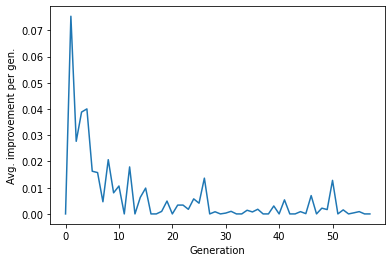

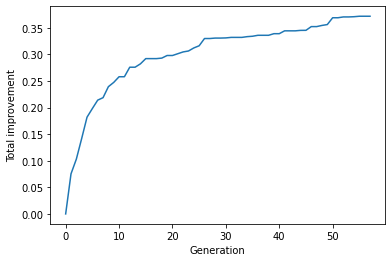

**************************************************************************************************** 
Generation 58/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:10:53 to process.
Remaining 441 generations and approximately 100:29:50
Average improvement for generation: 0.0 . Average total improvement: 0.3716907126917526
Total runtime: 12:19:31


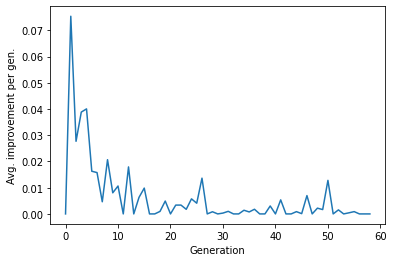

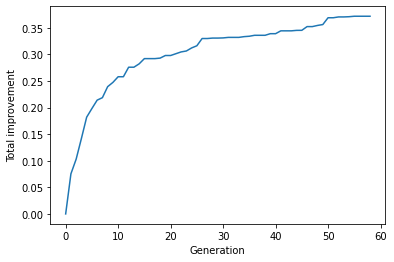

**************************************************************************************************** 
Generation 59/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0013447566610864659
Finished evaluating teritory 0
This generation took 0:12:52 to process.
Remaining 440 generations and approximately 97:21:09
Average improvement for generation: 0.0013447566610864659 . Average total improvement: 0.37303546935283904
Total runtime: 12:32:23


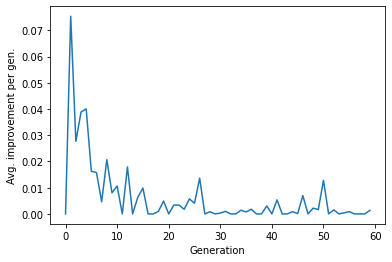

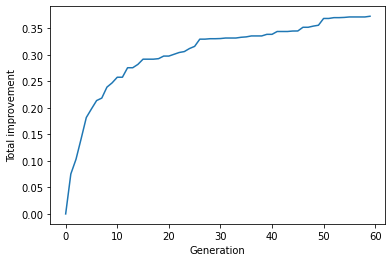

**************************************************************************************************** 
Generation 60/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0007167911892886902
Finished evaluating teritory 0
This generation took 0:16:33 to process.
Remaining 439 generations and approximately 109:07:52
Average improvement for generation: 0.0007167911892886902 . Average total improvement: 0.37375226054212773
Total runtime: 12:48:57


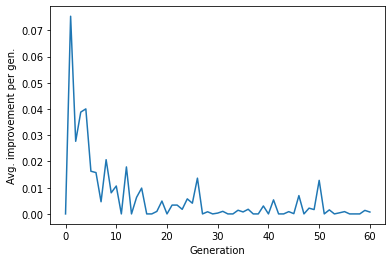

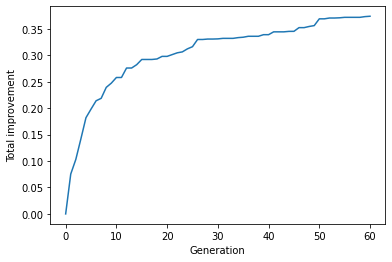

**************************************************************************************************** 
Generation 61/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.006007687089797598
Finished evaluating teritory 0
This generation took 0:12:33 to process.
Remaining 438 generations and approximately 100:15:09
Average improvement for generation: 0.006007687089797598 . Average total improvement: 0.37975994763192533
Total runtime: 13:01:30


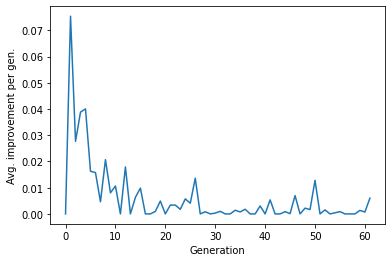

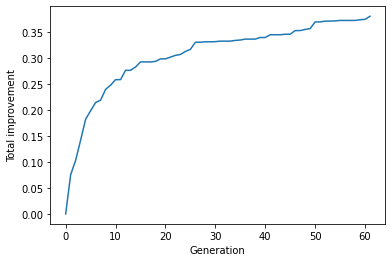

**************************************************************************************************** 
Generation 62/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:10:39 to process.
Remaining 437 generations and approximately 88:47:56
Average improvement for generation: 0.0 . Average total improvement: 0.37975994763192533
Total runtime: 13:12:09


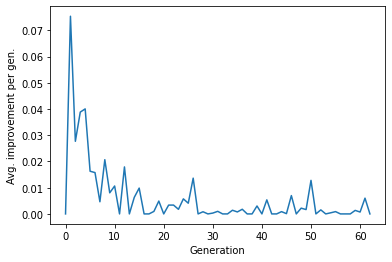

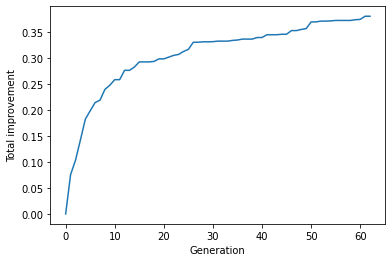

**************************************************************************************************** 
Generation 63/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0007895019827437455
Finished evaluating teritory 0
This generation took 0:10:03 to process.
Remaining 436 generations and approximately 80:50:30
Average improvement for generation: 0.0007895019827437455 . Average total improvement: 0.3805494496146691
Total runtime: 13:22:12


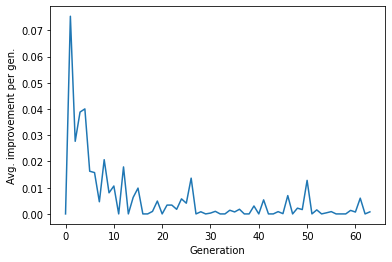

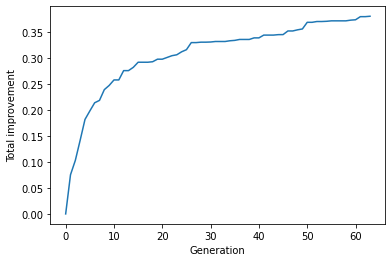

**************************************************************************************************** 
Generation 64/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:29 to process.
Remaining 435 generations and approximately 74:42:53
Average improvement for generation: 0.0 . Average total improvement: 0.3805494496146691
Total runtime: 13:31:41


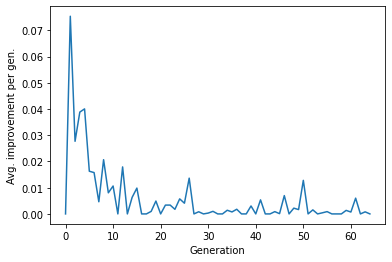

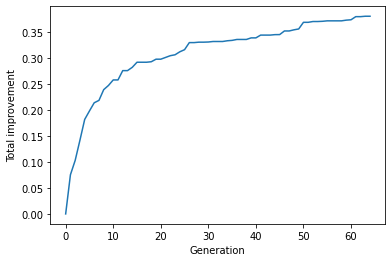

**************************************************************************************************** 
Generation 65/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:11:24 to process.
Remaining 434 generations and approximately 78:33:17
Average improvement for generation: 0.0 . Average total improvement: 0.3805494496146691
Total runtime: 13:43:06


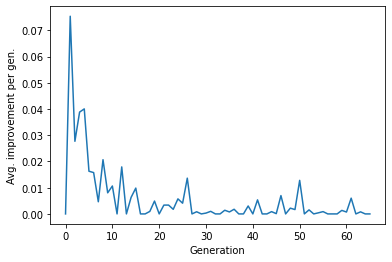

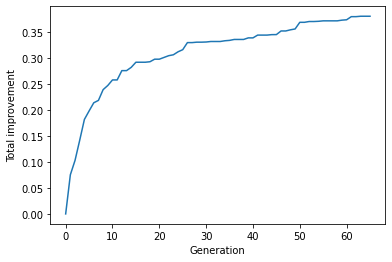

**************************************************************************************************** 
Generation 66/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:10:17 to process.
Remaining 433 generations and approximately 76:17:38
Average improvement for generation: 0.0 . Average total improvement: 0.3805494496146691
Total runtime: 13:53:23


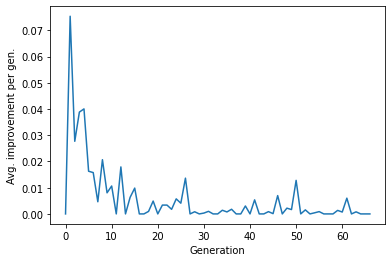

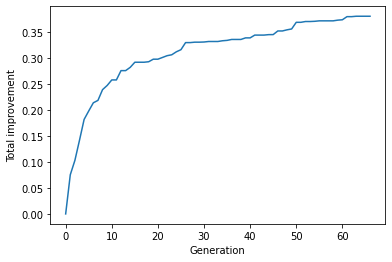

**************************************************************************************************** 
Generation 67/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:11:59 to process.
Remaining 432 generations and approximately 81:13:22
Average improvement for generation: 0.0 . Average total improvement: 0.3805494496146691
Total runtime: 14:05:23


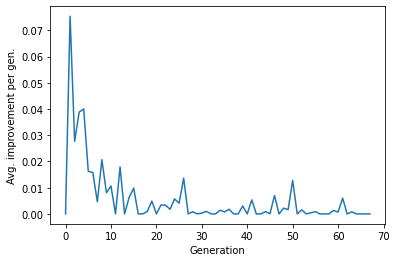

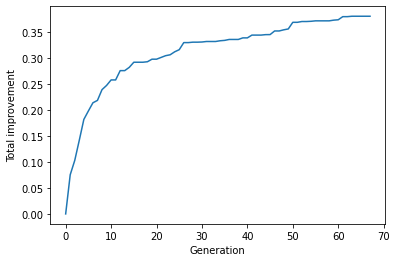

**************************************************************************************************** 
Generation 68/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0005789969238447767
Finished evaluating teritory 0
This generation took 0:12:16 to process.
Remaining 431 generations and approximately 84:37:35
Average improvement for generation: 0.0005789969238447767 . Average total improvement: 0.38112844653851385
Total runtime: 14:17:40


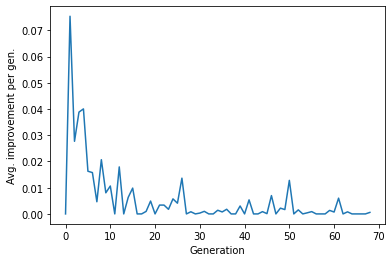

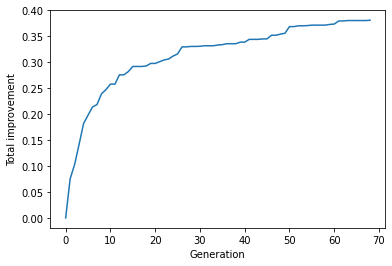

**************************************************************************************************** 
Generation 69/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:10:21 to process.
Remaining 430 generations and approximately 79:20:04
Average improvement for generation: 0.0 . Average total improvement: 0.38112844653851385
Total runtime: 14:28:01


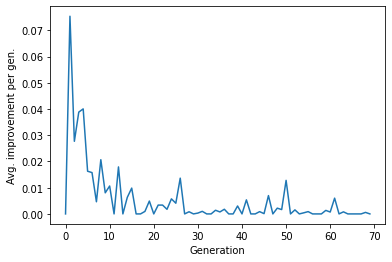

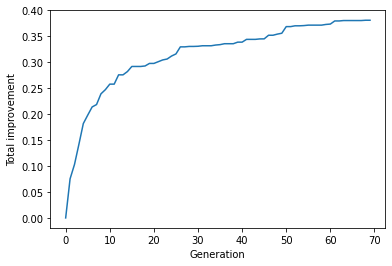

**************************************************************************************************** 
Generation 70/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0006925119409000313
Finished evaluating teritory 0
This generation took 0:11:23 to process.
Remaining 429 generations and approximately 80:17:15
Average improvement for generation: 0.0006925119409000313 . Average total improvement: 0.3818209584794139
Total runtime: 14:39:24


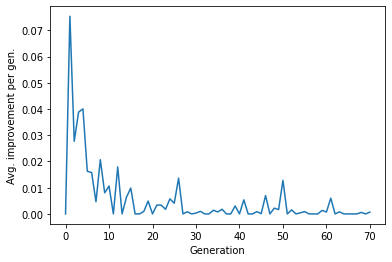

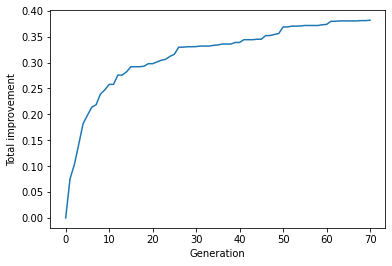

**************************************************************************************************** 
Generation 71/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:11:07 to process.
Remaining 428 generations and approximately 79:45:07
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 14:50:32


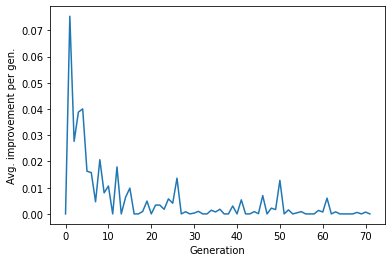

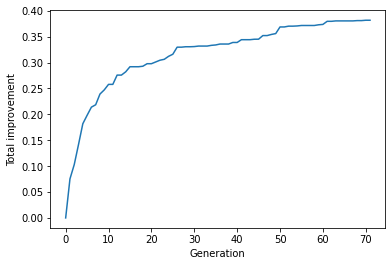

**************************************************************************************************** 
Generation 72/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:31 to process.
Remaining 427 generations and approximately 66:35:07
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 14:58:04


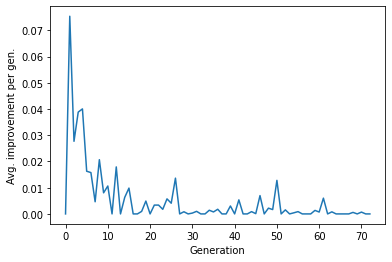

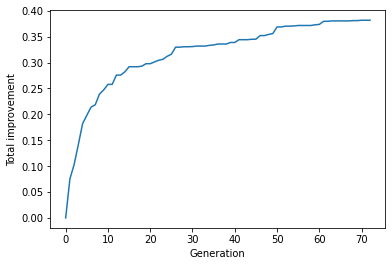

**************************************************************************************************** 
Generation 73/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:13:39 to process.
Remaining 426 generations and approximately 81:42:12
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 15:11:44


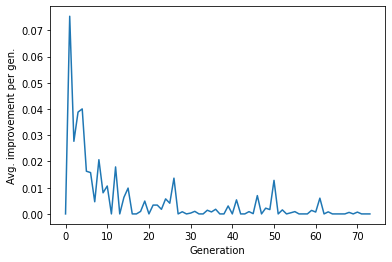

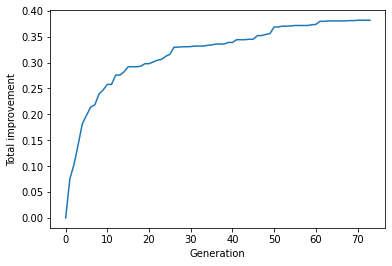

**************************************************************************************************** 
Generation 74/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:38 to process.
Remaining 425 generations and approximately 74:54:49
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 15:21:22


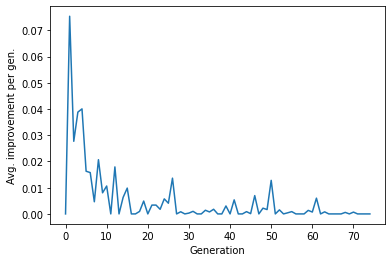

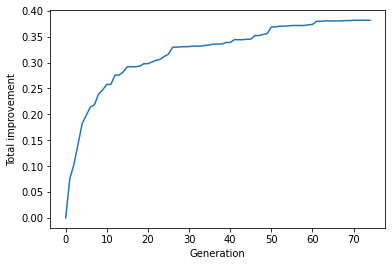

**************************************************************************************************** 
Generation 75/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:35 to process.
Remaining 424 generations and approximately 64:09:57
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 15:28:58


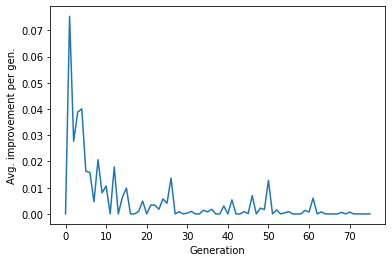

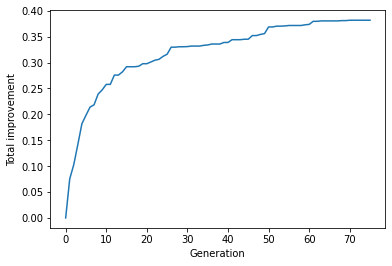

**************************************************************************************************** 
Generation 76/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:07:08 to process.
Remaining 423 generations and approximately 57:12:04
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 15:36:06


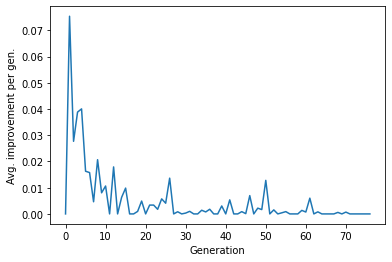

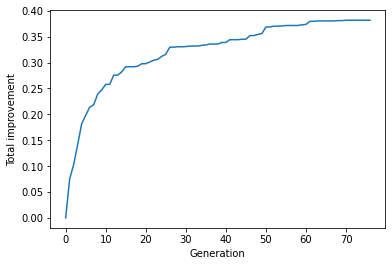

**************************************************************************************************** 
Generation 77/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:14:12 to process.
Remaining 422 generations and approximately 78:31:15
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 15:50:19


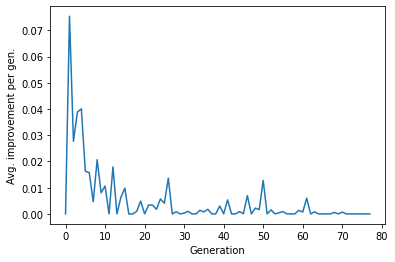

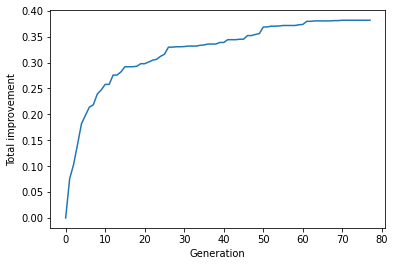

**************************************************************************************************** 
Generation 78/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:40 to process.
Remaining 421 generations and approximately 83:36:25
Average improvement for generation: 0.0 . Average total improvement: 0.3818209584794139
Total runtime: 16:02:59


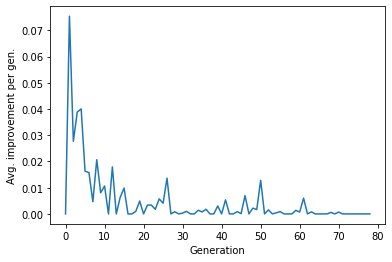

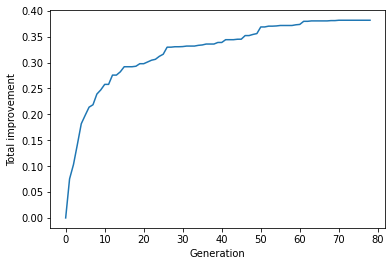

**************************************************************************************************** 
Generation 79/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.005048374308270764
Finished evaluating teritory 0
This generation took 0:15:26 to process.
Remaining 420 generations and approximately 95:45:59
Average improvement for generation: 0.005048374308270764 . Average total improvement: 0.38686933278768465
Total runtime: 16:18:26


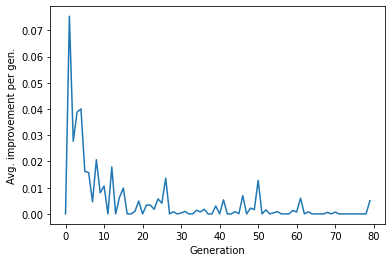

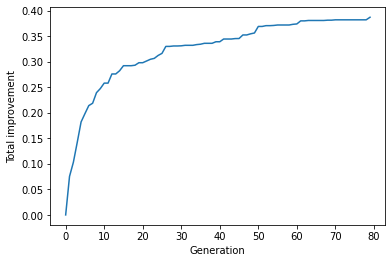

**************************************************************************************************** 
Generation 80/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:01 to process.
Remaining 419 generations and approximately 79:16:18
Average improvement for generation: 0.0 . Average total improvement: 0.38686933278768465
Total runtime: 16:27:27


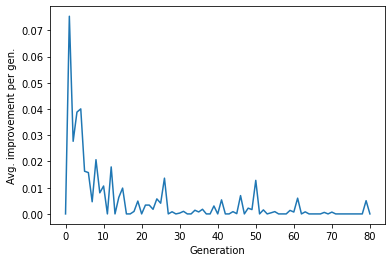

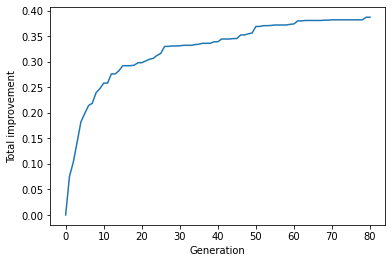

**************************************************************************************************** 
Generation 81/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.00017128031932056587
Finished evaluating teritory 0
This generation took 0:11:06 to process.
Remaining 418 generations and approximately 78:14:22
Average improvement for generation: 0.00017128031932056587 . Average total improvement: 0.3870406131070052
Total runtime: 16:38:34


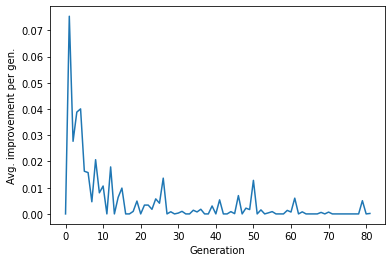

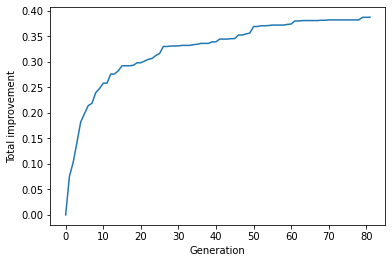

**************************************************************************************************** 
Generation 82/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:11:14 to process.
Remaining 417 generations and approximately 78:05:59
Average improvement for generation: 0.0 . Average total improvement: 0.3870406131070052
Total runtime: 16:49:49


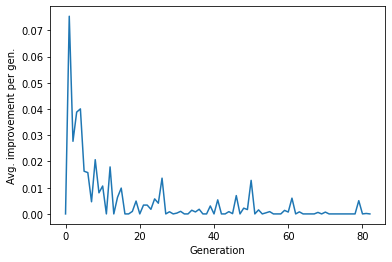

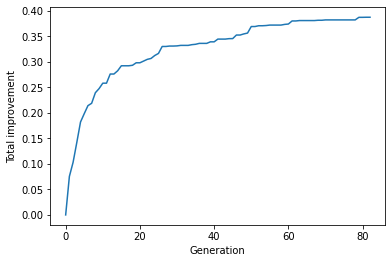

**************************************************************************************************** 
Generation 83/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:35 to process.
Remaining 416 generations and approximately 82:36:33
Average improvement for generation: 0.0 . Average total improvement: 0.3870406131070052
Total runtime: 17:02:24


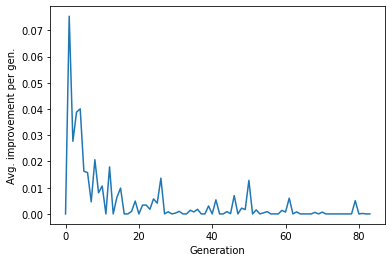

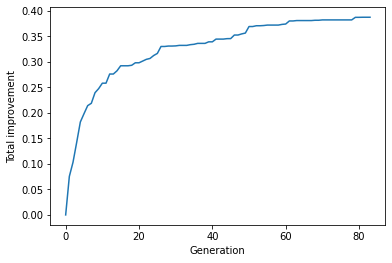

**************************************************************************************************** 
Generation 84/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:48 to process.
Remaining 415 generations and approximately 85:30:44
Average improvement for generation: 0.0 . Average total improvement: 0.3870406131070052
Total runtime: 17:15:13


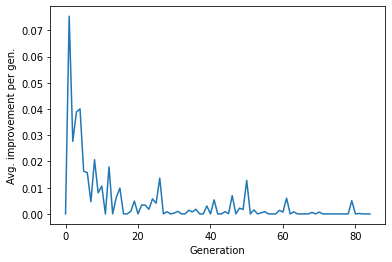

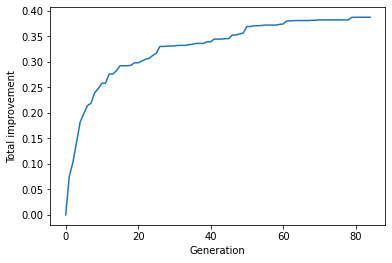

**************************************************************************************************** 
Generation 85/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0006342551057867407
Finished evaluating teritory 0
This generation took 0:12:28 to process.
Remaining 414 generations and approximately 85:42:12
Average improvement for generation: 0.0006342551057867407 . Average total improvement: 0.38767486821279196
Total runtime: 17:27:42


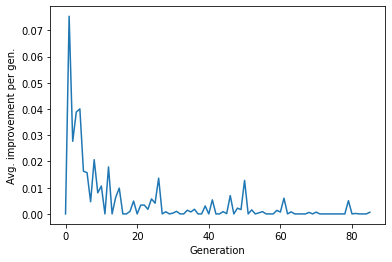

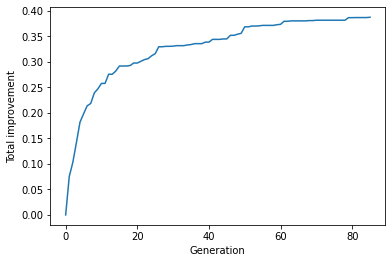

**************************************************************************************************** 
Generation 86/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:14:09 to process.
Remaining 413 generations and approximately 91:29:51
Average improvement for generation: 0.0 . Average total improvement: 0.38767486821279196
Total runtime: 17:41:51


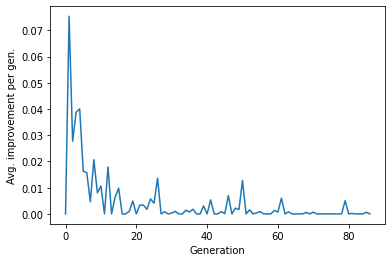

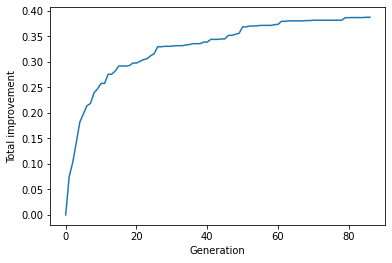

**************************************************************************************************** 
Generation 87/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:59 to process.
Remaining 412 generations and approximately 79:57:33
Average improvement for generation: 0.0 . Average total improvement: 0.38767486821279196
Total runtime: 17:51:51


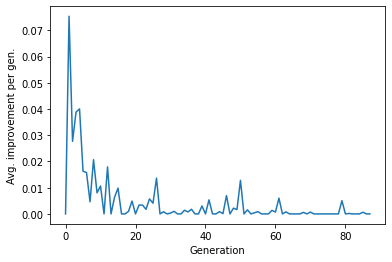

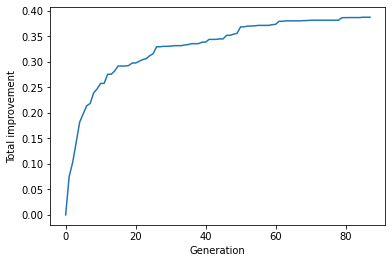

**************************************************************************************************** 
Generation 88/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0015464676871770333
Finished evaluating teritory 0
This generation took 0:14:47 to process.
Remaining 411 generations and approximately 90:31:47
Average improvement for generation: 0.0015464676871770333 . Average total improvement: 0.389221335899969
Total runtime: 18:06:38


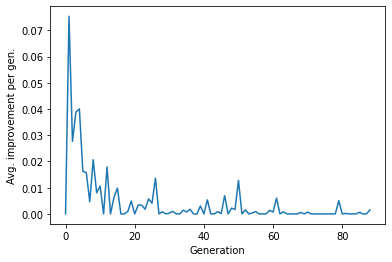

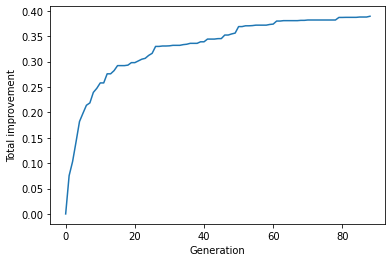

**************************************************************************************************** 
Generation 89/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:14:32 to process.
Remaining 410 generations and approximately 94:49:49
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 18:21:11


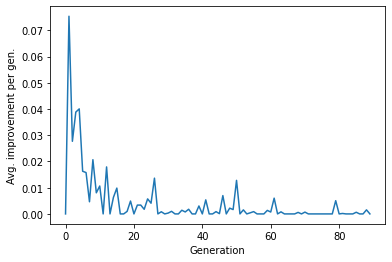

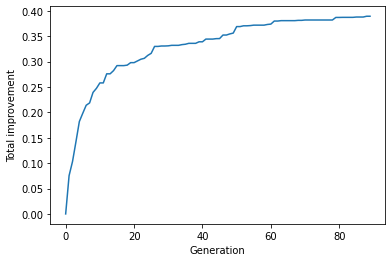

**************************************************************************************************** 
Generation 90/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:37 to process.
Remaining 409 generations and approximately 76:40:19
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 18:29:48


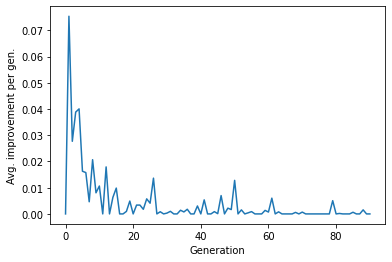

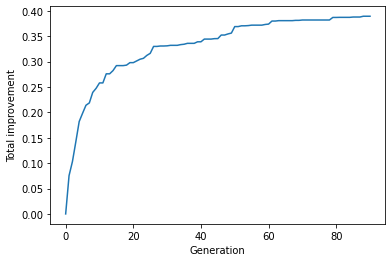

**************************************************************************************************** 
Generation 91/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:47 to process.
Remaining 408 generations and approximately 71:31:02
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 18:39:35


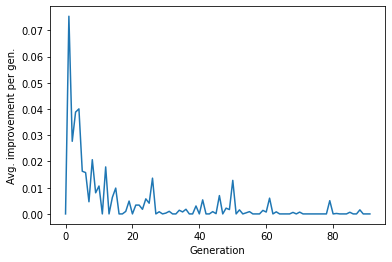

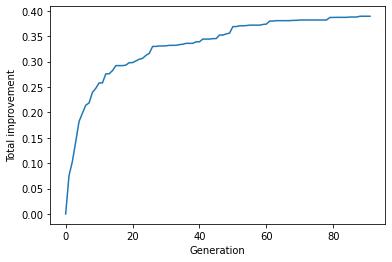

**************************************************************************************************** 
Generation 92/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:06 to process.
Remaining 407 generations and approximately 63:09:52
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 18:47:41


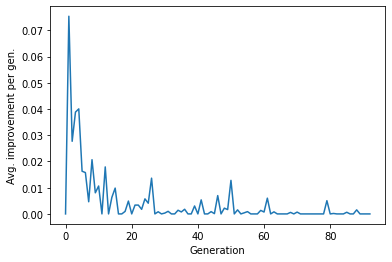

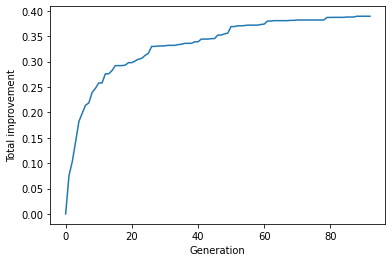

**************************************************************************************************** 
Generation 93/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:09 to process.
Remaining 406 generations and approximately 72:36:59
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 18:59:51


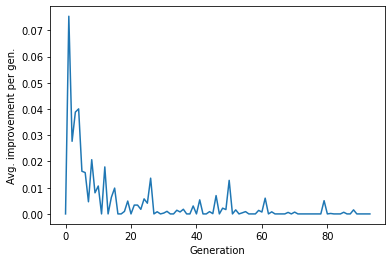

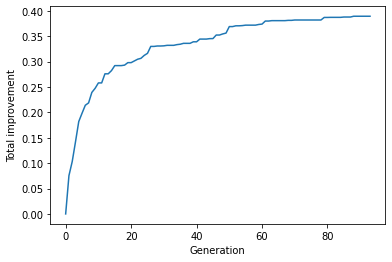

**************************************************************************************************** 
Generation 94/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:13:32 to process.
Remaining 405 generations and approximately 81:53:56
Average improvement for generation: 0.0 . Average total improvement: 0.389221335899969
Total runtime: 19:13:23


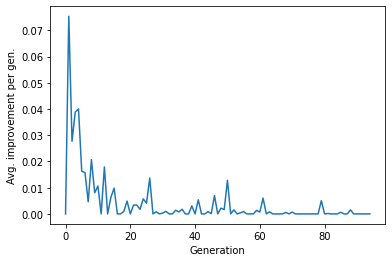

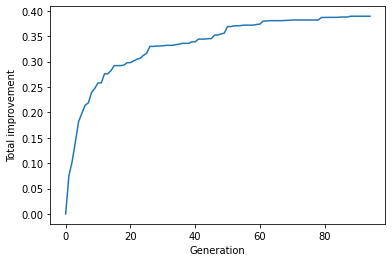

**************************************************************************************************** 
Generation 95/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.005842450141522182
Finished evaluating teritory 0
This generation took 0:15:36 to process.
Remaining 404 generations and approximately 93:25:00
Average improvement for generation: 0.005842450141522182 . Average total improvement: 0.39506378604149117
Total runtime: 19:28:59


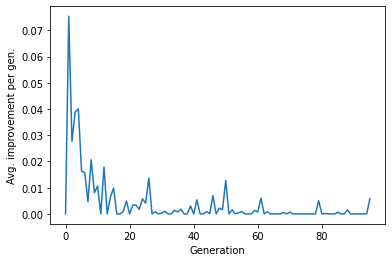

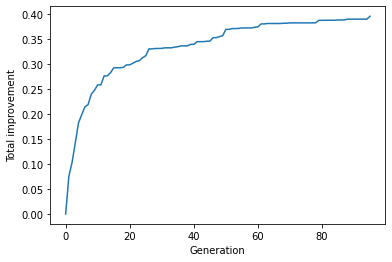

**************************************************************************************************** 
Generation 96/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:10:14 to process.
Remaining 403 generations and approximately 80:57:49
Average improvement for generation: 0.0 . Average total improvement: 0.39506378604149117
Total runtime: 19:39:14


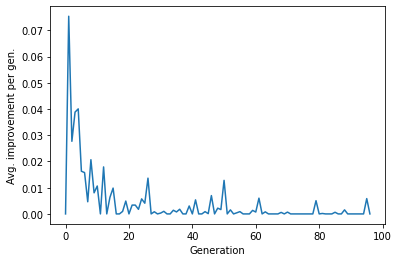

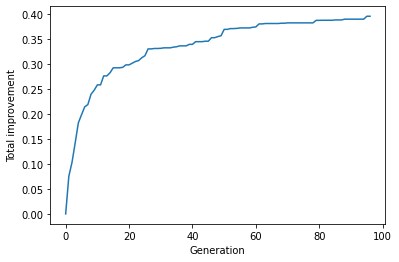

**************************************************************************************************** 
Generation 97/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.002137358979323656
Finished evaluating teritory 0
This generation took 0:12:35 to process.
Remaining 402 generations and approximately 82:34:23
Average improvement for generation: 0.002137358979323656 . Average total improvement: 0.3972011450208148
Total runtime: 19:51:49


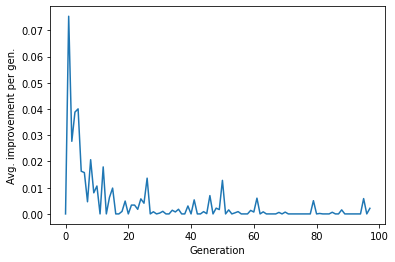

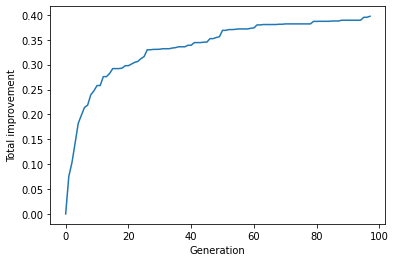

**************************************************************************************************** 
Generation 98/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:12:52 to process.
Remaining 401 generations and approximately 84:12:47
Average improvement for generation: 0.0 . Average total improvement: 0.3972011450208148
Total runtime: 20:04:42


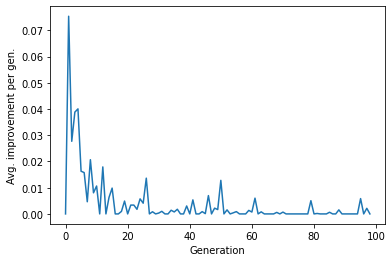

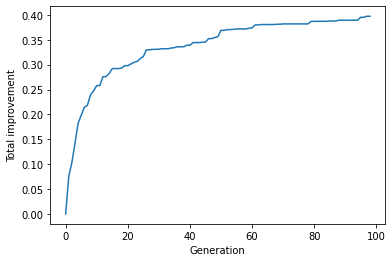

**************************************************************************************************** 
Generation 99/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0034462678673317093
Finished evaluating teritory 0
This generation took 0:10:42 to process.
Remaining 400 generations and approximately 77:42:34
Average improvement for generation: 0.0034462678673317093 . Average total improvement: 0.40064741288814654
Total runtime: 20:15:25


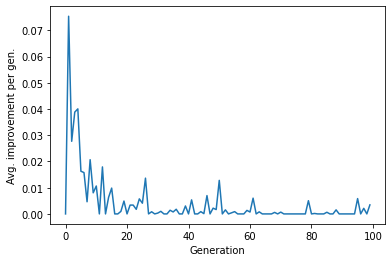

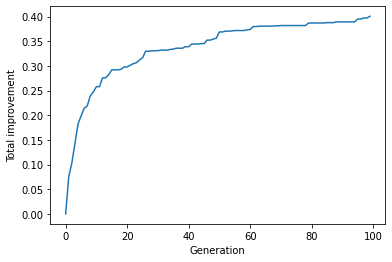

**************************************************************************************************** 
Generation 100/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0015788633890192472
Finished evaluating teritory 0
This generation took 0:14:43 to process.
Remaining 399 generations and approximately 87:42:09
Average improvement for generation: 0.0015788633890192472 . Average total improvement: 0.4022262762771658
Total runtime: 20:30:08


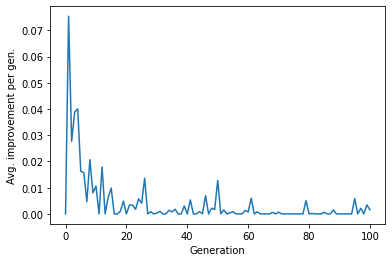

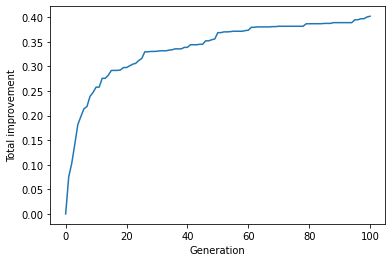

**************************************************************************************************** 
Generation 101/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0001566632392753231
Finished evaluating teritory 0
This generation took 0:09:55 to process.
Remaining 398 generations and approximately 76:38:33
Average improvement for generation: 0.0001566632392753231 . Average total improvement: 0.4023829395164411
Total runtime: 20:40:03


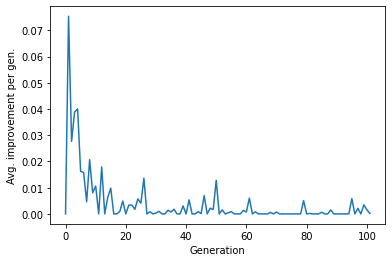

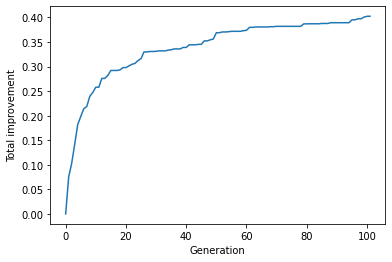

**************************************************************************************************** 
Generation 102/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0005830570106020172
Finished evaluating teritory 0
This generation took 0:11:56 to process.
Remaining 397 generations and approximately 77:42:17
Average improvement for generation: 0.0005830570106020172 . Average total improvement: 0.4029659965270431
Total runtime: 20:51:59


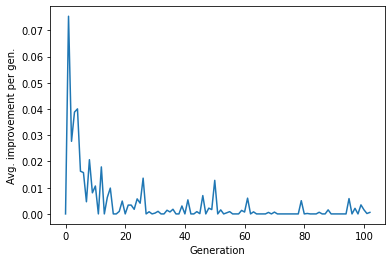

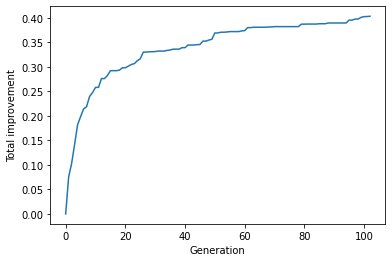

**************************************************************************************************** 
Generation 103/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:46 to process.
Remaining 396 generations and approximately 67:42:24
Average improvement for generation: 0.0 . Average total improvement: 0.4029659965270431
Total runtime: 21:00:45


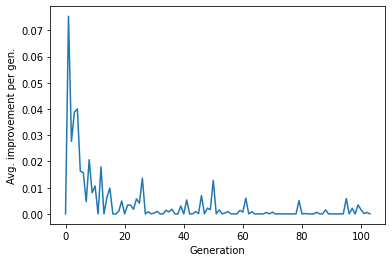

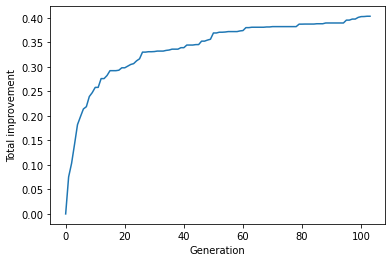

**************************************************************************************************** 
Generation 104/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:08:50 to process.
Remaining 395 generations and approximately 62:52:47
Average improvement for generation: 0.0 . Average total improvement: 0.4029659965270431
Total runtime: 21:09:36


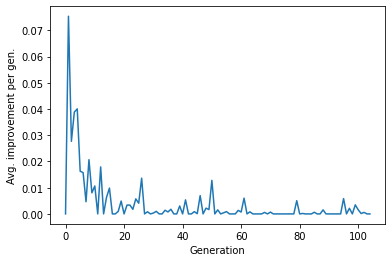

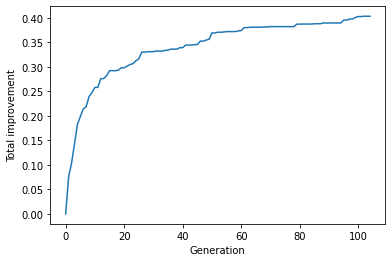

**************************************************************************************************** 
Generation 105/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:09:53 to process.
Remaining 394 generations and approximately 63:49:16
Average improvement for generation: 0.0 . Average total improvement: 0.4029659965270431
Total runtime: 21:19:29


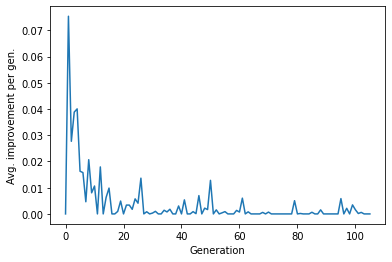

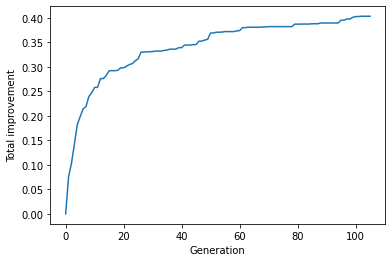

**************************************************************************************************** 
Generation 106/500
......................................................................................................................................................
Best MAE for teritory 0 is 19266.795382308177 . Average improvement is 0.0
Finished evaluating teritory 0
This generation took 0:16:31 to process.
Remaining 393 generations and approximately 85:57:07
Average improvement for generation: 0.0 . Average total improvement: 0.4029659965270431
Total runtime: 21:36:01


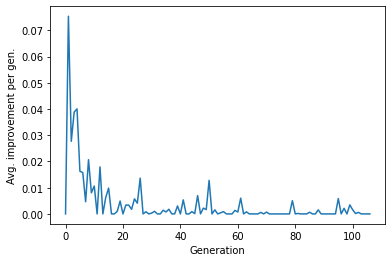

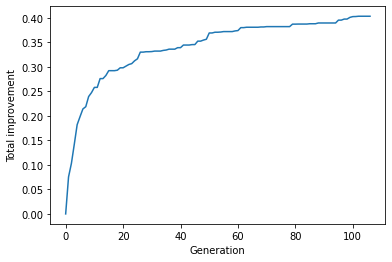

**************************************************************************************************** 
Generation 107/500
......................................................................................

In [ ]:
# Hyper parameter tuning (using a genetic algorithm)

n_features = X_train_prepped.shape[1]
n_samples = X_train_prepped.shape[0]
pop_size = 150
n_generations = 500
n_territories = 1
n_survivors = 30
drift_threshold = 0.0
small_step_mutation_rate = 0.1
large_step_mutation_rate = 0.01

param_limits = {
    'n_estimators':             (1, 1000),
    'max_depth':                (1, n_features),
    'min_samples_split':        (2, 1000),
    'min_samples_leaf':         (1, 1000),
    'min_weight_fraction_leaf': (0, 0.5),
    'max_features':             (1, n_features),
    'max_leaf_nodes':           (2, 10000),
    'min_impurity_decrease':    (0, 1),
    'bootstrap':                (True, False),
    'oob_score':                (True, False),
    'ccp_alpha':                (0, 1),
    'max_samples':              (1, n_samples),
}

"""
Format of ecosystem is:
{
  'last_generation': int,
  'times': [float,...],
  'improvements': [float,...],
  'average_total_improve': [float,...],
  'runtime_running_avg': float,
  'total_runtime': float,
  'avg_mae_survivors': [{
    'generation': int,
    'values': [None] * n_territories,
  }],
  'teritories': [
    [{hp:{}, mae=None},...],
    .
    .
    .
  ]
}
"""
ecosystem = {
    'last_generation': 0,
    'times': [],
    'improvements': [],
    'average_total_improve': [],
    'runtime_running_avg': 0,
    'total_runtime': 0,
    'avg_mae_survivors': [],
    'teritories': []
}


def init_env(ecosystem):
  teritories = []
  for i in range(n_territories):
    teritories.append([])
  ecosystem['teritories'] = teritories


def init_HP():
  """
  Provides a randomly initialized set of hyper parameters for a RandomForestRegressor
  """

  global n_features, n_samples, param_limits

  HP = {
      'n_estimators': int(random.randint(*param_limits['n_estimators'])),
      'max_depth': int(random.randint(*param_limits['max_depth'])),
      'min_samples_split': int(random.randint(*param_limits['min_samples_split'])),
      'min_samples_leaf': int(random.randint(*param_limits['min_samples_leaf'])),
      'min_weight_fraction_leaf': random.uniform(*param_limits['min_weight_fraction_leaf']),
      'max_features': int(random.randint(*param_limits['max_features'])),
      'max_leaf_nodes': int(random.randint(*param_limits['max_leaf_nodes'])),
      'min_impurity_decrease': random.uniform(*param_limits['min_impurity_decrease']),
      'bootstrap': bool(random.choice((True, False))),
      'oob_score': False,
      'ccp_alpha': random.uniform(*param_limits['ccp_alpha']),
      'max_samples': int(random.randint(*param_limits['max_samples'])),
  }

  if HP['bootstrap'] == True:
    HP['oob_score'] = bool(random.choice((True, False)))
  
  return HP


def evaluate_model(model, X_train, X_cv, y_train, y_cv):
  model.fit(X_train_prepped, y_train)
  pred = model.predict(X_cv_prepped)
  return mean_absolute_error(pred, y_cv)


def ragnge_size(limits):
  return limits[1] - limits[0]


def small_step_mutation(zygote):
  zygote['n_estimators'] = max(1, zygote['n_estimators'] + int(np.random.normal(0, ragnge_size(param_limits['n_estimators']) * small_step_mutation_rate)))
  zygote['max_depth'] = min(max(1, zygote['max_depth'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_depth']) * small_step_mutation_rate)))), n_features)
  zygote['min_samples_split'] = max(2, zygote['min_samples_split'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_split']) * small_step_mutation_rate)))
  zygote['min_samples_leaf'] = max(1, zygote['min_samples_leaf'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_leaf']) * small_step_mutation_rate)))
  zygote['min_weight_fraction_leaf'] = min(max(0, zygote['min_weight_fraction_leaf'] + np.random.normal(0, ragnge_size(param_limits['min_weight_fraction_leaf']) * small_step_mutation_rate)), 0.5)
  zygote['max_features'] = min(max(1, zygote['max_features'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_features']) * small_step_mutation_rate)))), n_features)
  zygote['max_leaf_nodes'] = max(2, zygote['max_leaf_nodes'] + int(np.random.normal(0, ragnge_size(param_limits['max_leaf_nodes']) * small_step_mutation_rate)))
  zygote['min_impurity_decrease'] += max(0, np.random.normal(0, ragnge_size(param_limits['min_impurity_decrease']) * small_step_mutation_rate))
  zygote['bootstrap'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['bootstrap'] else small_step_mutation_rate for x in [True, False]]))
  zygote['oob_score'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['oob_score'] else small_step_mutation_rate for x in [True, False]]))
  zygote['ccp_alpha'] = max(0, zygote['ccp_alpha'] + int(np.random.normal(0, ragnge_size(param_limits['ccp_alpha']) * small_step_mutation_rate)))
  zygote['max_samples'] = min(max(1, zygote['max_samples'] + int(np.random.normal(0, ragnge_size(param_limits['max_samples']) * small_step_mutation_rate))), n_samples)

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def should_do_large_step():
  return np.random.choice([True, False], p=[1 - large_step_mutation_rate, large_step_mutation_rate])


def large_step_mutation(zygote):
  global param_limits

  if should_do_large_step():
    zygote['n_estimators'] = int(random.randint(*param_limits['n_estimators']))
  if should_do_large_step():
    zygote['max_depth'] = int(random.randint(*param_limits['max_depth']))
  if should_do_large_step():
    zygote['min_samples_split'] = int(random.randint(*param_limits['min_samples_split']))
  if should_do_large_step():
    zygote['min_samples_leaf'] = int(random.randint(*param_limits['min_samples_leaf']))
  if should_do_large_step():
    zygote['min_weight_fraction_leaf'] = random.uniform(*param_limits['min_weight_fraction_leaf'])
  if should_do_large_step():
    zygote['max_features'] = int(random.randint(*param_limits['max_features']))
  if should_do_large_step():
    zygote['max_leaf_nodes'] = int(random.randint(*param_limits['max_leaf_nodes']))
  if should_do_large_step():
    zygote['min_impurity_decrease'] = random.uniform(*param_limits['min_impurity_decrease'])
  if should_do_large_step():
    zygote['bootstrap'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['oob_score'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['ccp_alpha'] = random.uniform(*param_limits['ccp_alpha'])
  if should_do_large_step():
    zygote['max_samples'] = int(random.randint(*param_limits['max_samples']))

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def mutate(zygote):
  zygote = small_step_mutation(zygote)
  zygote = large_step_mutation(zygote)
  return zygote


def fertilize(male, female):
  parents = [male, female]

  return mutate({
      'n_estimators': random.choice(parents)['hp']['n_estimators'],
      'max_depth': random.choice(parents)['hp']['max_depth'],
      'min_samples_split': random.choice(parents)['hp']['min_samples_split'],
      'min_samples_leaf': random.choice(parents)['hp']['min_samples_leaf'],
      'min_weight_fraction_leaf': random.choice(parents)['hp']['min_weight_fraction_leaf'],
      'max_features': random.choice(parents)['hp']['max_features'],
      'max_leaf_nodes': random.choice(parents)['hp']['max_leaf_nodes'],
      'min_impurity_decrease': random.choice(parents)['hp']['min_impurity_decrease'],
      'bootstrap': random.choice(parents)['hp']['bootstrap'],
      'oob_score': random.choice(parents)['hp']['oob_score'],
      'ccp_alpha': random.choice(parents)['hp']['ccp_alpha'],
      'max_samples': random.choice(parents)['hp']['max_samples'],
  })


def breed(population):
  queen_ant = population[0]
  male = random_gen.choice(population[1:n_survivors])
  return {'hp': fertilize(male, queen_ant), 'mae': None}


def perform_drift(teritories, idx):
  teritory_1 = teritories[idx]
  teritory_2 = random.choice([x for x in teritories if x is not teritory_1])
  specimen_1 = random_gen.choice(teritory_1[:n_survivors])
  specimen_2 = random_gen.choice(teritory_2[:n_survivors])
  teritory_1.remove(specimen_1)
  teritory_2.remove(specimen_2)
  teritory_1.append(specimen_2)
  teritory_2.append(specimen_1)


class Survivor:
  def __init__(self, hp, mae):
    self.hp = hp
    self.mae = mae
  
  def __lt__(self, other):
    return self.mae < other.mae
  
  def to_dict(self):
    return {'hp': self.hp, 'mae': self.mae}


def seconds2timestr(seconds): 
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
  
  return "%d:%02d:%02d" % (hour, minutes, seconds)


def process_specimen(population, idx):
  global preped_X_train, preped_X_cv, y_train, y_cv
  if population[idx]['mae'] is None:
    model = model_from_hp(population[idx]['hp'])
    population[idx]['mae'] = evaluate_model(model, X_train_prepped, X_cv_prepped, y_train, y_cv)
  return population[idx]


def process_teritory(ecosystem, need_drift, idx, executor):
    teritories = ecosystem['teritories']
    futures = [executor.submit(process_specimen, teritories[idx], i) for i in range(len(teritories[idx]))]
    survivors = []
    for future in concurrent.futures.as_completed(futures):
        heapq.heappush(survivors, Survivor(**future.result()))
        print('.', end='')
    # normal = random_gen.normal(0, n_survivors, size=len(teritories[idx]))
    # abs_normal = np.abs(normal)
    # probs = abs_normal / np.sum(abs_normal)
    # sorted_probs = sorted(probs, reverse=True)
    # for i in range(n_survivors, len(sorted_probs)):
    #   for j in range(n_survivors):
    #     sorted_probs[j] += sorted_probs[i] / 2
    #     sorted_probs[i] /= 2
    # survivors = random_gen.choice(survivors, replace=False, size=n_survivors, p=sorted_probs)
    # survivors = sorted(survivors.tolist())
    survivors = heapq.nsmallest(n_survivors, survivors)
    new_avg_mae_survivors = np.mean([x.mae for x in survivors])
    try:
      improvement = ecosystem['avg_mae_survivors'][-2]['values'][idx] / new_avg_mae_survivors - 1
      if n_territories > 1 and improvement < drift_threshold:
        need_drift[idx] = True
    except Exception as ex:
      improvement = 0
    ecosystem['avg_mae_survivors'][-1]['values'][idx] = new_avg_mae_survivors
    print("\nBest MAE for teritory", idx, "is", survivors[0].mae, ". Average improvement is", improvement)
    teritories[idx] = [x.to_dict() for x in survivors]
    offsprings = []
    futures = [executor.submit(breed, teritories[idx]) for i in range((pop_size - len(teritories[idx])))]
    for future in concurrent.futures.as_completed(futures):
        offsprings.append(future.result())
    teritories[idx] += offsprings
    print("Finished evaluating teritory", idx)
    return improvement


try:
  with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)
    generations_passed = ecosystem['last_generation'] + 1
except Exception as e:
  for i in range(n_territories):
    ecosystem['teritories'].append([{'hp': init_HP(), 'mae': None} for i in range(int(pop_size))])
  generations_passed = 0

# Supress warnings to avoid terminal clutter
logging.captureWarnings(True)


with concurrent.futures.ThreadPoolExecutor() as executor:
  for generation in range(generations_passed, n_generations):
    print("*" * 100, "\nGeneration", str(generation) + '/' + str(n_generations))
    start_time = time.time()
    need_drift = [False] * n_territories
    ecosystem['avg_mae_survivors'].append({'generation': generation, 'values':[0] * n_territories})
    improvements = []
    futures = [executor.submit(process_teritory, ecosystem, need_drift, idx, executor) for idx in range(len(ecosystem['teritories']))]
    for future in concurrent.futures.as_completed(futures):
      improvements.append(future.result())
    average_improve = float(np.mean(improvements))
    try:
      ecosystem['average_total_improve'].append(ecosystem['average_total_improve'][-1] + average_improve)
    except:
      ecosystem['average_total_improve'].append(average_improve)
    ecosystem['improvements'].append(average_improve)
    sum_drifts = sum(need_drift)
    # n_survivors = max(MIN_SURVIVORS, min(pop_size - 5, n_survivors - 2 + sum_drifts))
    small_step_mutation_rate = 0.1 * (sum_drifts + 1)
    large_step_mutation_rate = 0.01 * (sum_drifts + 1)
    if n_territories > 1:
      print("Need drift:", sum_drifts) 
      for i in range(len(need_drift)):
        if need_drift[i] is True:
          perform_drift(ecosystem['teritories'], i)
    ecosystem['last_generation'] = generation
    end_time = time.time()
    generation_process_time = end_time - start_time
    ecosystem['total_runtime'] += generation_process_time
    ecosystem['runtime_running_avg'] = (ecosystem['runtime_running_avg'] + generation_process_time) / 2
    ecosystem['times'].append(generation_process_time)
    with open(os.path.join(project_files_path, 'ecosystem.json'), 'w') as f:
      json.dump(ecosystem, f)
    remaining_generations = n_generations - generation - 1
    print("This generation took", seconds2timestr(generation_process_time), "to process.")
    print("Remaining", remaining_generations, "generations and approximately", seconds2timestr(ecosystem['runtime_running_avg'] * remaining_generations))
    print("Average improvement for generation:", average_improve, ". Average total improvement:", ecosystem['average_total_improve'][-1])
    print("Total runtime:", seconds2timestr(ecosystem['total_runtime']))
    plt.plot(ecosystem['improvements'])
    plt.xlabel("Generation")
    plt.ylabel("Avg. improvement per gen.")
    plt.show()
    plt.plot(ecosystem['average_total_improve'])
    plt.xlabel("Generation")
    plt.ylabel("Total improvement")
    plt.show()
    

In [ ]:
# Prepeare test predictions
with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)

X_train_cv = pd.concat([preped_X_train, preped_X_cv], axis=0)
y_train_cv = pd.concat([y_train, y_cv], axis=0)

best_hp = ecosystem['teritories'][0][0]['hp']
best_mae = ecosystem['teritories'][0][0]['mae']
for teritory in ecosystem['teritories']:
  for specimen in teritory:
    if specimen['mae'] is not None and specimen['mae'] < best_mae:
      best_mae = specimen['mae']
      best_hp = specimen['hp']

print(best_hp)

model = model_from_hp(best_hp)

print("Fitting")

model.fit(X_train_cv, y_train_cv)

print("Predicting")

preds_test = model.predict(preped_X_test)

print("Saving")

output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)

In [ ]:
output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)